<a href="https://colab.research.google.com/github/atrikhs/Pytorch/blob/main/Pytorch_Regn_MultiLayer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Define model
class LinearRegV3(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer1 = nn.Linear(in_features=3, out_features=8)
        self.linear_layer2 = nn.Linear(in_features=8, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer2(self.linear_layer1(x))

# Data generation
np.random.seed(42)
X1 = np.random.randn(10000)
X2 = np.random.randn(10000)
X3 = np.random.randn(10000)

w1, w2, w3, b = 23, 15, 31, 97
y = w1 * X1 + w2 * X2 + w3 * X3 + b
X = pd.DataFrame({'X1': X1, 'X2': X2, 'X3': X3})

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).unsqueeze(1)
X_test = torch.from_numpy(X_test.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32)).unsqueeze(1)

# Device setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Model, loss, optimizer
torch.manual_seed(42)
model1 = LinearRegV3().to(device)
loss_fn = nn.MSELoss()
# optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)
optimizer = torch.optim.SGD(model1.parameters(), lr=0.001)


# Move data to device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)


Epoch [100/300], Loss: 0.0000
Epoch [200/300], Loss: 0.0000
Epoch [300/300], Loss: 0.0000
Test MSE Loss: 0.0000


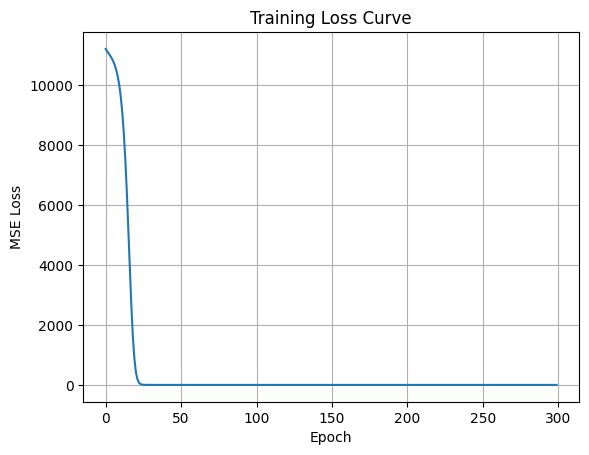

In [2]:

# Training loop
epochs = 300
losses = []

for epoch in range(epochs):
    model1.train()
    y_pred = model1(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# Evaluation
model1.eval()
with torch.no_grad():
    y_test_pred = model1(X_test)
    test_loss = loss_fn(y_test_pred, y_test)
    print(f"Test MSE Loss: {test_loss.item():.4f}")

# Plot loss curve
plt.plot(losses)
plt.title("Training Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


In [3]:
model1.state_dict()

OrderedDict([('linear_layer1.weight',
              tensor([[ 0.4583,  0.4894, -0.1231],
                      [ 0.4044, -0.2111, -0.0888],
                      [-0.6612,  0.0850, -0.0946],
                      [-0.6297,  0.3628, -0.2350],
                      [ 1.3029,  0.6650,  1.6844],
                      [-0.4902,  0.1701, -0.5869],
                      [ 0.8859,  0.9209,  1.5882],
                      [-1.5230, -1.2088, -1.9491]], device='cuda:0')),
             ('linear_layer1.bias',
              tensor([-0.3820, -0.7606, -1.6627, -1.1530,  3.5063, -2.1718,  5.0718, -6.2234],
                     device='cuda:0')),
             ('linear_layer2.weight',
              tensor([[-0.1968, -0.6476, -1.6552, -1.1907,  4.1276, -2.2201,  5.4303, -6.7763]],
                     device='cuda:0')),
             ('linear_layer2.bias', tensor([3.3644], device='cuda:0'))])

In [7]:
# w1, w2, w3, b = 23, 15, 31, 97
y_test_pred[:5], y_test[:5]

(tensor([[209.5277],
         [ 95.7081],
         [178.8506],
         [ 97.4673],
         [ 72.0245]], device='cuda:0'),
 tensor([[209.5277],
         [ 95.7081],
         [178.8506],
         [ 97.4673],
         [ 72.0245]], device='cuda:0'))